# Welcome to The `Paramter Calcualtor`

In [4]:
import time
time.sleep(1)
print("""Please select appropriate orgnism type
            1: Algae
            2: Plant""")
species = int(input("Please Select the specific type"))
if species == 1:
    print("Welcome to ALgae Paramters Calculator")
    print("Please select the appropriate paramater")
    print("""Select option as
                1. Carbohydrate
                2. Protein
                3. Lipids
                4. Chl. a 
                5. Chl. b 
                6. Carotenoids
                7. Production
                8. Productiity
                9. Biomass Production
                10. Further More Option Will be Added""")
    sel_paraneter = int(input('Please select desired parameter for calculation: '))
    if sel_paraneter == 1:
        print('carbshydrate')
elif species == 2:
    print("Welcome to Plant Paramters Calculator")
    print("Please select the appropriate paramater")
    print("""Select option as
                1. Carbohydrate
                2. Protein
                3. Lipids
                4. Chl. a 
                5. Chl. b 
                6. Carotenoids
                7. Production
                8. Productiity
                9. Biomass Production
                10. APX (Ascorbate Peroxidase)
                11. CAT (Catalse)
                12. POD (Peroxidase)
                13. SOD (Superoxide Dismutase)
                14. GSH (Glutathione)
                15. GR (Glutathion reducatse)
                16. Further More Option Will be Added""")
    

Please select appropriate orgnism type
            1: Algae
            2: Plant
Welcome to ALgae Paramters Calculator
Please select the appropriate paramater
Select option as
                1. Carbohydrate
                2. Protein
                3. Lipids
                4. Chl. a 
                5. Chl. b 
                6. Carotenoids
                7. Production
                8. Productiity
                9. Biomass Production
                10. Further More Option Will be Added
carbshydrate


In [1]:
import time

# Define menu options
menus = {
    "organism": {
        1: "Algae",
        2: "Plant",
    },
    "algae": {
        1: "Carbohydrate",
        2: "Protein",
        3: "Lipids",
        4: "Chl. a",
        5: "Chl. b",
        6: "Carotenoids",
        7: "Production",
        8: "Productivity",
        9: "Biomass Production",
        10: "Further Options",
    },
    "plant": {
        1: "Carbohydrate",
        2: "Protein",
        3: "Lipids",
        4: "Chl. a",
        5: "Chl. b",
        6: "Carotenoids",
        7: "Production",
        8: "Productivity",
        9: "Biomass Production",
        10: "APX (Ascorbate Peroxidase)",
        11: "CAT (Catalase)",
        12: "POD (Peroxidase)",
        13: "SOD (Superoxide Dismutase)",
        14: "GSH (Glutathione)",
        15: "GR (Glutathion Reductase)",
        16: "Further Options",
    },
}

def display_menu(options):
    for key, value in options.items():
        print(f"{key}: {value}")

def get_choice(prompt, options):
    try:
        choice = int(input(prompt))
        if choice in options:
            return choice
        else:
            print("Invalid choice. Try again.")
            return get_choice(prompt, options)
    except ValueError:
        print("Please enter a valid number.")
        return get_choice(prompt, options)

def handle_algae():
    print("Welcome to Algae Parameters Calculator")
    display_menu(menus["algae"])
    param_choice = get_choice("Please select a parameter: ", menus["algae"])
    print(f"You selected: {menus['algae'][param_choice]}")

def handle_plant():
    print("Welcome to Plant Parameters Calculator")
    display_menu(menus["plant"])
    param_choice = get_choice("Please select a parameter: ", menus["plant"])
    print(f"You selected: {menus['plant'][param_choice]}")

# Main application flow
def main():
    time.sleep(1)
    print("Please select appropriate organism type")
    display_menu(menus["organism"])
    species = get_choice("Please select the specific type: ", menus["organism"])

    if species == 1:
        handle_algae()
    elif species == 2:
        handle_plant()

if __name__ == "__main__":
    main()


Please select appropriate organism type
1: Algae
2: Plant
Welcome to Algae Parameters Calculator
1: Carbohydrate
2: Protein
3: Lipids
4: Chl. a
5: Chl. b
6: Carotenoids
7: Production
8: Productivity
9: Biomass Production
10: Further Options
You selected: Biomass Production


In [1]:
import numpy as np

# Problem 1: Successive Over-Relaxation (SOR) Method
def problem1_sor():
    # Define parameters
    n = 50  # Matrix size
    A = np.diag(5 * np.ones(n)) + np.diag(-1 * np.ones(n - 1), 1) + np.diag(-1 * np.ones(n - 1), -1)  # Tridiagonal matrix
    b = np.ones(n)  # Right Hand Side vector
    tol = 1e-5  # Tolerance for convergence
    max_iter = 10000  # Maximum number of iterations
    omegas = [0.5, 1.0, 1.7]  # Relaxation factors

    # Iterate over relaxation factors
    for omega in omegas:
        x, iter_count = sor_method(A, b, omega, tol, max_iter)

        # Display results
        print(f'Relaxation factor: {omega}')
        print(f'Number of iterations: {iter_count}')
        print('Solution x (first 5 values):')
        print(x[:5])  # Display the first 5 values of the solution
        print('--------------------------------------------')

# SOR Method Implementation
def sor_method(A, b, omega, tol, max_iter):
    n = len(b)  # Size of the system
    x = np.zeros(n)  # Initial guess
    iter_count = 0  # Iteration counter
    converged = False

    while not converged and iter_count < max_iter:
        x_old = np.copy(x)  # Store previous solution
        for i in range(n):
            # Update x(i) using the SOR formula
            sum1 = np.dot(A[i, :i], x[:i])  # A(i, 1:i-1) * x(1:i-1)
            sum2 = np.dot(A[i, i+1:], x_old[i+1:])  # A(i, i+1:end) * x_old(i+1:end)
            x[i] = (1 - omega) * x[i] + omega * (b[i] - sum1 - sum2) / A[i, i]

        # Check for convergence
        if np.linalg.norm(x - x_old, np.inf) < tol:
            converged = True
        
        iter_count += 1  # Increment iteration count

    # If max_iter is reached without convergence
    if not converged:
        print(f'SOR method did not converge for omega = {omega}')

    return x, iter_count

# Call the main function to run the SOR method
problem1_sor()


Relaxation factor: 0.5
Number of iterations: 24
Solution x (first 5 values):
[0.26375394 0.31879908 0.33028579 0.33268228 0.33318205]
--------------------------------------------
Relaxation factor: 1.0
Number of iterations: 9
Solution x (first 5 values):
[0.26376166 0.31881189 0.33030153 0.33269955 0.33320005]
--------------------------------------------
Relaxation factor: 1.7
Number of iterations: 41
Solution x (first 5 values):
[0.26376262 0.31881308 0.33030278 0.33270082 0.33320132]
--------------------------------------------


C:\Users\mirza\AppData\Local\Temp\ipykernel_20220\1872207602.py:23: RuntimeWarning: divide by zero encountered in divide
  Z = Z - (Z**3 - 1) / (3 * Z**2)  # Newton-Raphson formula
C:\Users\mirza\AppData\Local\Temp\ipykernel_20220\1872207602.py:23: RuntimeWarning: invalid value encountered in divide
  Z = Z - (Z**3 - 1) / (3 * Z**2)  # Newton-Raphson formula


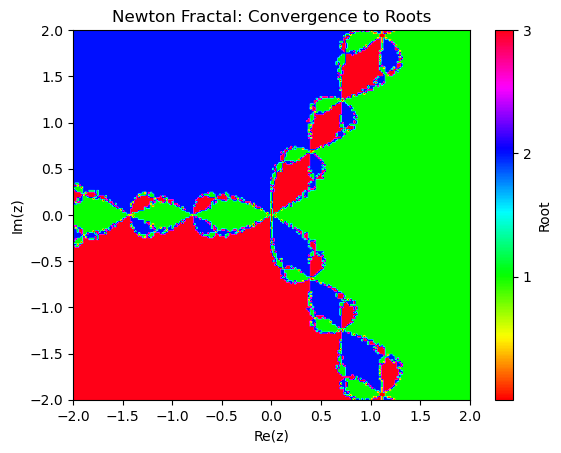

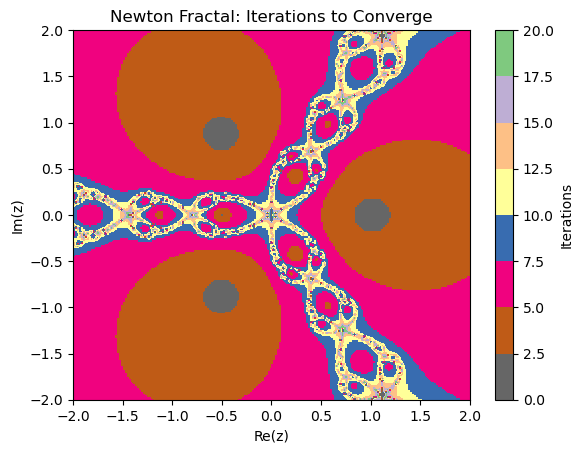

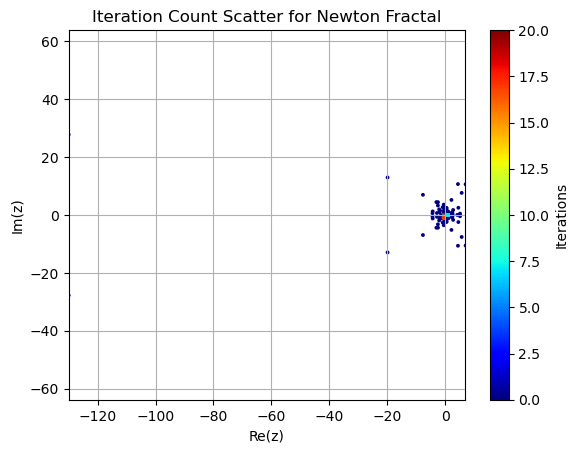

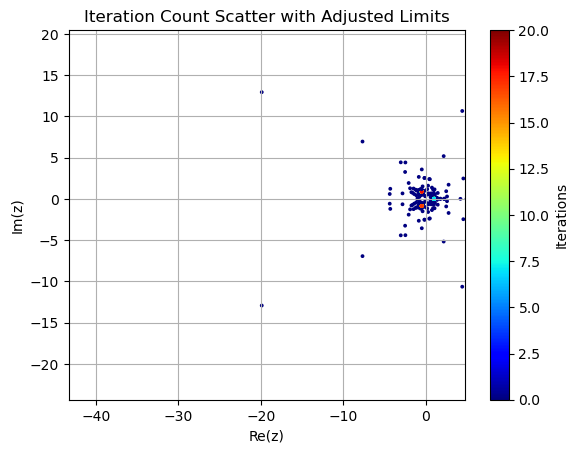

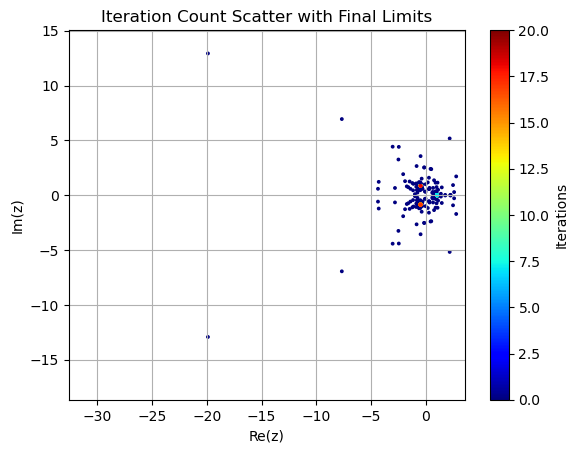

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the complex plane
x = np.linspace(-2, 2, 201)  # Real part
y = np.linspace(-2, 2, 201)  # Imaginary part
X, Y = np.meshgrid(x, y)  # 2D grid
Z = X + 1j * Y  # Initialize complex grid points

# Newton-Raphson parameters
max_iter = 20  # Maximum iterations
tol = 0.001  # Convergence tolerance
roots = [1, np.exp(2j * np.pi / 3), np.exp(-2j * np.pi / 3)]  # Roots of z^3 - 1
n_roots = len(roots)

# Initialize outputs
convergence = np.zeros(Z.shape)  # Store which root each point converges to
iterations = np.zeros(Z.shape)  # Store iteration counts

# Newton-Raphson iteration
for k in range(max_iter):
    Z_old = Z.copy()  # Store current values
    Z = Z - (Z**3 - 1) / (3 * Z**2)  # Newton-Raphson formula
    
    # Check for convergence to each root
    for r in range(n_roots):
        mask = np.abs(Z - roots[r]) < tol  # Points close to root r
        convergence[mask & (convergence == 0)] = r + 1  # Mark converged points (1-indexed)
        iterations[mask & (iterations == 0)] = k + 1  # Record iteration count (1-indexed)

# Visualization: Root Convergence (Using imagesc)
plt.figure()
plt.imshow(convergence, extent=[x[0], x[-1], y[0], y[-1]], origin='lower', cmap='hsv', aspect='auto')
plt.colorbar(ticks=range(1, n_roots + 1), label='Root')
plt.title('Newton Fractal: Convergence to Roots')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.savefig('newton_fractal_convergence.png', dpi=300)

# Visualization: Iteration Count (Using imagesc)
plt.figure()
plt.imshow(iterations, extent=[x[0], x[-1], y[0], y[-1]], origin='lower', cmap='Accent_r', aspect='auto')
plt.colorbar(label='Iterations')
plt.title('Newton Fractal: Iterations to Converge')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.savefig('newton_fractal_iterations.png', dpi=300)

# Visualization: Iteration Count with Scatter
plt.figure()
plt.scatter(np.real(Z_old), np.imag(Z_old), c=iterations.flatten(), cmap='jet', s=3)
plt.colorbar(label='Iterations')
plt.title('Iteration Count Scatter for Newton Fractal')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.axis('equal')
plt.grid(True)
plt.xlim([-130, 7])
plt.ylim([-62, 62])
plt.savefig('iteration_count_scatter1.png', dpi=300)

# Further adjusted axis limits
plt.figure()
plt.scatter(np.real(Z_old), np.imag(Z_old), c=iterations.flatten(), cmap='jet', s=3)
plt.colorbar(label='Iterations')
plt.title('Iteration Count Scatter with Adjusted Limits')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.axis('equal')
plt.grid(True)
plt.xlim([-43.3, 4.8])
plt.ylim([-23.7, 19.8])
plt.savefig('iteration_count_scatter2.png', dpi=300)

# Final adjustment for axis limits
plt.figure()
plt.scatter(np.real(Z_old), np.imag(Z_old), c=iterations.flatten(), cmap='jet', s=3)
plt.colorbar(label='Iterations')
plt.title('Iteration Count Scatter with Final Limits')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.axis('equal')
plt.grid(True)
plt.xlim([-32.6, 3.6])
plt.ylim([-18.1, 14.5])
plt.savefig('iteration_count_scatter3.png', dpi=300)

plt.show()
